In [1]:
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
import matplotlib.patches as mpatches
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
# Import seaborn for visualisation/plotting
import seaborn as sns

%matplotlib inline


### 1) Read in the file

In [3]:
# Read the trainning file
route46A = pd.read_csv('new_merge_weather.csv')

In [4]:
route46A.head()

,Unnamed: 0,Date_Time,Sequence,StopID,Planned_Arr,Actual_Arr,rain,temp,rhum,wdsp,wddir,vis
0,0,02-JAN-18 00:00:00,60,803,25434,25239,0.0,3.7,78,12,240,30000
1,1,02-JAN-18 00:00:00,7,813,63698,63501,0.0,3.7,78,12,240,30000
2,2,02-JAN-18 00:00:00,9,81,63878,63703,0.0,3.7,78,12,240,30000
3,3,02-JAN-18 00:00:00,10,817,63977,63780,0.0,3.7,78,12,240,30000
4,4,02-JAN-18 00:00:00,11,818,64030,63792,0.0,3.7,78,12,240,30000


In [5]:
route46A = route46A.drop('Unnamed: 0', axis=1)

In [6]:
route46A.head()

,Date_Time,Sequence,StopID,Planned_Arr,Actual_Arr,rain,temp,rhum,wdsp,wddir,vis
0,02-JAN-18 00:00:00,60,803,25434,25239,0.0,3.7,78,12,240,30000
1,02-JAN-18 00:00:00,7,813,63698,63501,0.0,3.7,78,12,240,30000
2,02-JAN-18 00:00:00,9,81,63878,63703,0.0,3.7,78,12,240,30000
3,02-JAN-18 00:00:00,10,817,63977,63780,0.0,3.7,78,12,240,30000
4,02-JAN-18 00:00:00,11,818,64030,63792,0.0,3.7,78,12,240,30000


### 2) Add in date and dayofweek

In [7]:
date_time = list(route46A['Date_Time'])

In [8]:
len(date_time)

209771

In [9]:
only_date = []
for i in date_time:
    date = i[0:9]
    only_date.append(date)

In [10]:
only_date[0]

'02-JAN-18'

In [11]:
import datetime
week_day = []
for i in only_date:
    week_day.append(datetime.datetime.strptime(i,'%d-%b-%y').strftime('%A'))

In [12]:
week_day[209770]

'Friday'

In [13]:
route46A = route46A.assign(Date=only_date)

In [14]:
route46A.head()

,Date_Time,Sequence,StopID,Planned_Arr,Actual_Arr,rain,temp,rhum,wdsp,wddir,vis,Date
0,02-JAN-18 00:00:00,60,803,25434,25239,0.0,3.7,78,12,240,30000,02-JAN-18
1,02-JAN-18 00:00:00,7,813,63698,63501,0.0,3.7,78,12,240,30000,02-JAN-18
2,02-JAN-18 00:00:00,9,81,63878,63703,0.0,3.7,78,12,240,30000,02-JAN-18
3,02-JAN-18 00:00:00,10,817,63977,63780,0.0,3.7,78,12,240,30000,02-JAN-18
4,02-JAN-18 00:00:00,11,818,64030,63792,0.0,3.7,78,12,240,30000,02-JAN-18


In [15]:
route46A = route46A.assign(Day=week_day)
route46A.head()

,Date_Time,Sequence,StopID,Planned_Arr,Actual_Arr,rain,temp,rhum,wdsp,wddir,vis,Date,Day
0,02-JAN-18 00:00:00,60,803,25434,25239,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
1,02-JAN-18 00:00:00,7,813,63698,63501,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
2,02-JAN-18 00:00:00,9,81,63878,63703,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
3,02-JAN-18 00:00:00,10,817,63977,63780,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
4,02-JAN-18 00:00:00,11,818,64030,63792,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday


### 3) Understand the features

In [16]:
route46A.dtypes

Date_Time       object
Sequence         int64
StopID           int64
Planned_Arr      int64
Actual_Arr       int64
rain           float64
temp           float64
rhum             int64
wdsp             int64
wddir            int64
vis              int64
Date            object
Day             object
dtype: object

In [17]:
route46A['Date_Time'].unique()

array(['02-JAN-18 00:00:00', '03-JAN-18 00:00:00', '04-JAN-18 00:00:00',
       '05-JAN-18 00:00:00', '06-JAN-18 00:00:00', '08-JAN-18 00:00:00',
       '09-JAN-18 00:00:00', '10-JAN-18 00:00:00', '11-JAN-18 00:00:00',
       '12-JAN-18 00:00:00', '13-JAN-18 00:00:00', '14-JAN-18 00:00:00',
       '15-JAN-18 00:00:00', '16-JAN-18 00:00:00', '17-JAN-18 00:00:00',
       '18-JAN-18 00:00:00', '19-JAN-18 00:00:00', '22-JAN-18 00:00:00',
       '23-JAN-18 00:00:00', '24-JAN-18 00:00:00', '25-JAN-18 00:00:00',
       '26-JAN-18 00:00:00'], dtype=object)

In [18]:
##Sequence
route46A['Sequence'].unique()

array([60,  7,  9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24,  6,
        5,  3,  2, 27, 25, 37, 47, 38,  4, 18,  1, 26, 44, 43, 34, 28, 46,
       29, 31, 32, 33, 30, 50, 41, 36, 45, 42, 39, 40, 35, 48, 49, 51, 52,
       15, 53, 55, 54, 56, 57, 58, 59, 64, 63, 62,  8, 61], dtype=int64)

In [19]:
##StopID
route46A['StopID'].unique()

array([ 803,  813,   81,  817,  818,  819,  264, 6059,  406,  747,  845,
        846,  847,  848, 2795,  756,  812,  811,  809,  808, 2069,  461,
       4728, 4727, 2065, 2064, 2063,  757, 2062, 2060, 7353, 2020, 4571,
        810,  842,  807, 2061, 2059,  758, 2036, 2017, 2015, 2009, 2057,
       2056,  759,  760, 2019,  761,  763, 2007, 2008, 2013, 4570,  762,
       2070, 4565, 2014, 4567, 2022, 2034, 2032, 2031, 2021, 2018, 2016,
       4636, 4566, 2084,  768,  769, 2010,  435,  334, 7658, 2033, 7491,
        320,  792,  786,  908,  907,  906,  278,  804,  775,  774,  773,
        772,  771,  770,  777,    2,  796, 2035, 2039,  192,  806,  802,
        801,  800,  799,  798,  797,  805, 4569, 2046,  776, 2041,  814,
       2044, 2043,  795, 2045, 2040, 2058, 2068, 4568, 2042,  909, 4962,
        767, 7513,  401], dtype=int64)

In [20]:
##rain
route46A['rain'].unique()

array([0. , 0.1])

In [21]:
##temp
route46A['temp'].unique()

array([ 3.7,  5.2,  6.1,  3.8,  0.1,  4.1,  5.5,  4. ,  3. ,  7.8,  6.6,
        9.5,  3.2,  0.2,  9.3,  0.5,  7.9,  9.7, 11.5])

In [22]:
route46A['Date'].unique()

array(['02-JAN-18', '03-JAN-18', '04-JAN-18', '05-JAN-18', '06-JAN-18',
       '08-JAN-18', '09-JAN-18', '10-JAN-18', '11-JAN-18', '12-JAN-18',
       '13-JAN-18', '14-JAN-18', '15-JAN-18', '16-JAN-18', '17-JAN-18',
       '18-JAN-18', '19-JAN-18', '22-JAN-18', '23-JAN-18', '24-JAN-18',
       '25-JAN-18', '26-JAN-18'], dtype=object)

In [23]:
route46A['Day'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Monday',
       'Sunday'], dtype=object)

In [24]:
route46A.shape

(209771, 13)

In [26]:
# Select the categorical ferature
categorical = ['Sequence','StopID','rain','temp','Date','Day']

# Convert them to categorical
for col in categorical:
    route46A[col] = route46A[col].astype('category')

route46A.dtypes

Date_Time        object
Sequence       category
StopID         category
Planned_Arr       int64
Actual_Arr        int64
rain           category
temp           category
rhum              int64
wdsp              int64
wddir             int64
vis               int64
Date           category
Day            category
dtype: object

In [27]:
route46A.head()

,Date_Time,Sequence,StopID,Planned_Arr,Actual_Arr,rain,temp,rhum,wdsp,wddir,vis,Date,Day
0,02-JAN-18 00:00:00,60,803,25434,25239,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
1,02-JAN-18 00:00:00,7,813,63698,63501,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
2,02-JAN-18 00:00:00,9,81,63878,63703,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
3,02-JAN-18 00:00:00,10,817,63977,63780,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
4,02-JAN-18 00:00:00,11,818,64030,63792,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday


In [28]:
route46A.select_dtypes(['category']).describe().T

,count,unique,top,freq
Sequence,209771,64,1,3597
StopID,209771,124,2039,3411
rain,209771,2,0,185218
temp,209771,19,5.5,23152
Date,209771,22,11-JAN-18,14371
Day,209771,7,Friday,41841


In [31]:
continuous = ['Date_Time','Planned_Arr','rhum','wdsp','wddir','vis']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012D05A1F9E8>,
      dtype=object)

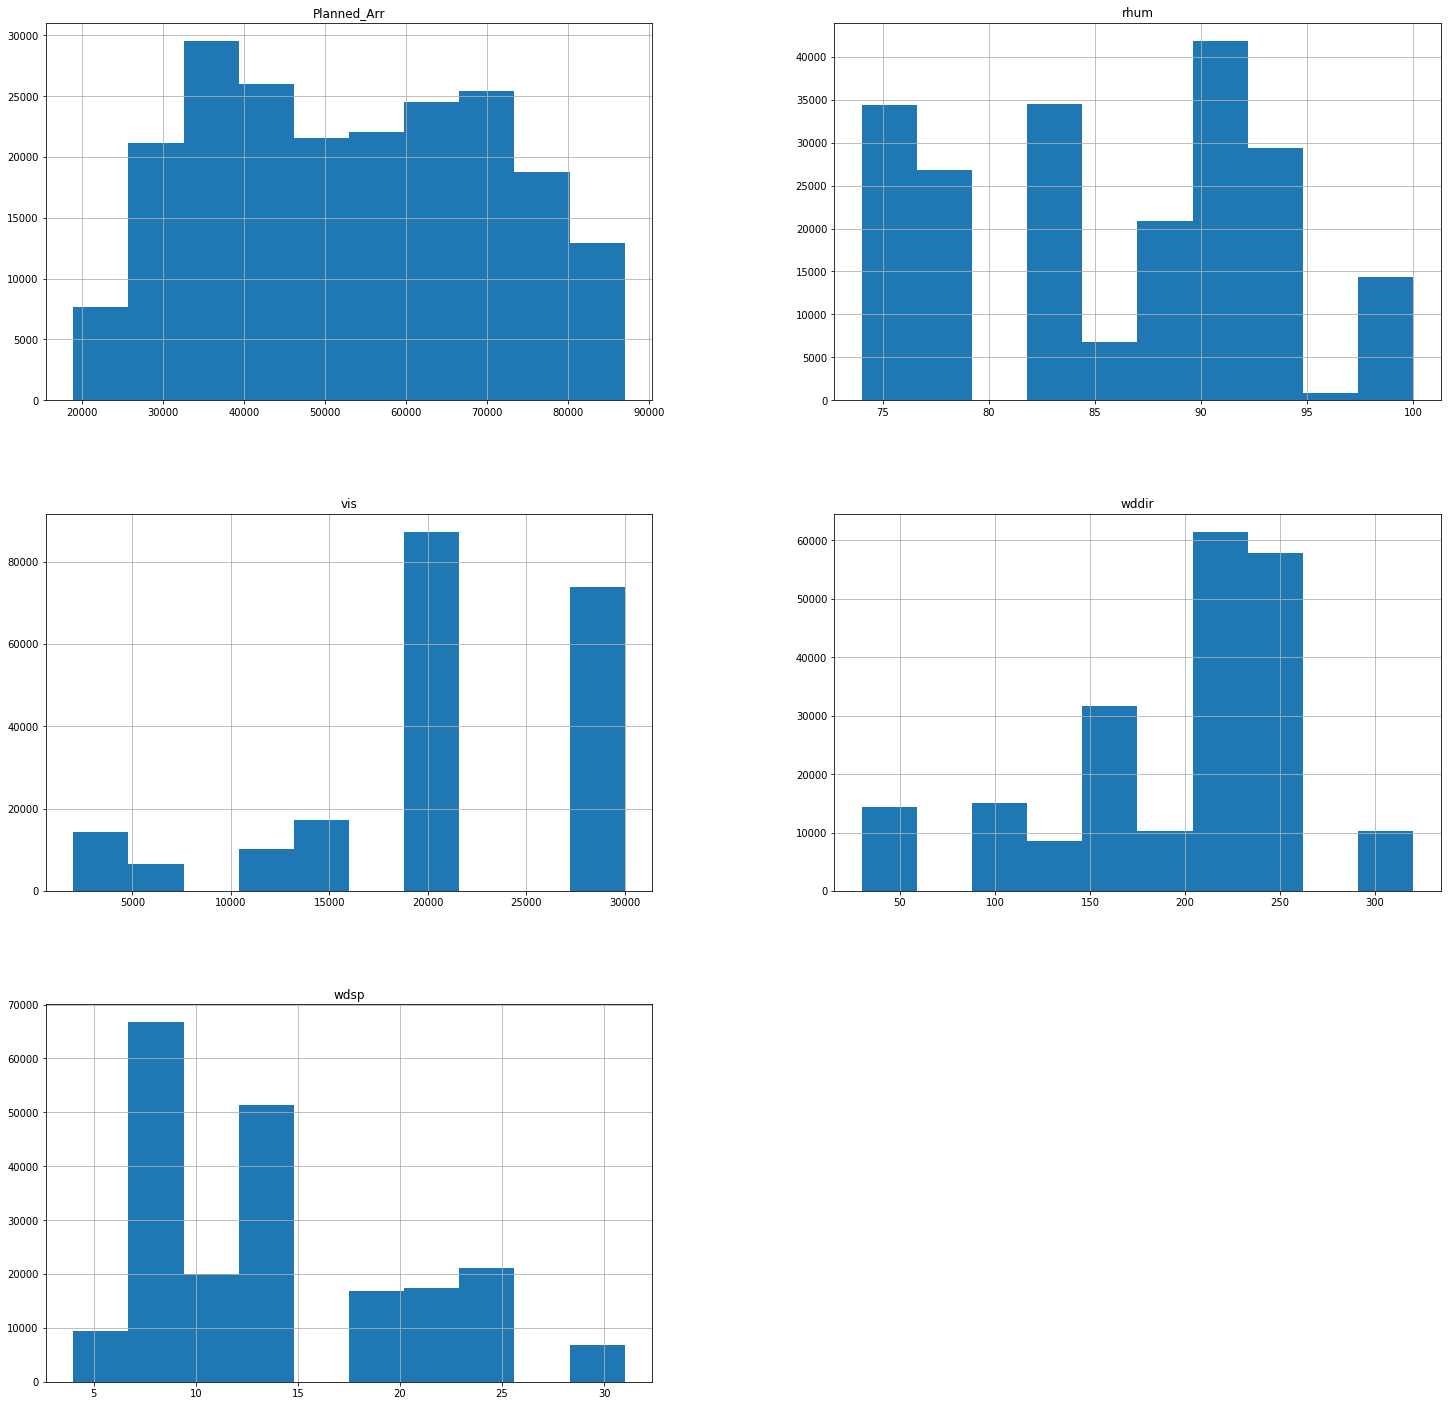

In [32]:
route46A[continuous].hist(figsize=(25,25))

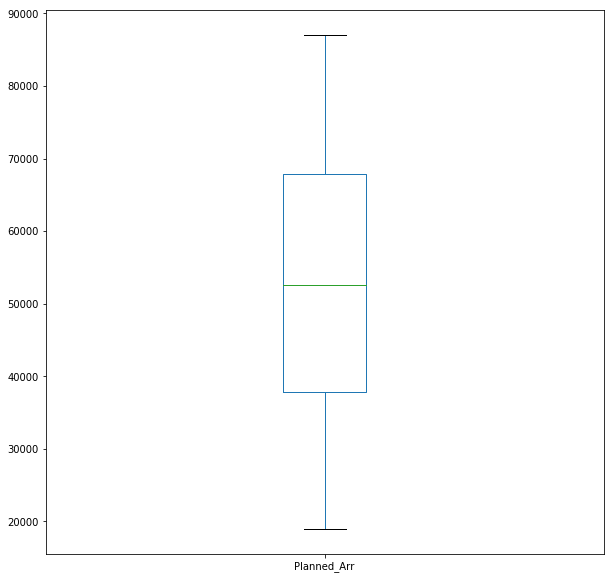

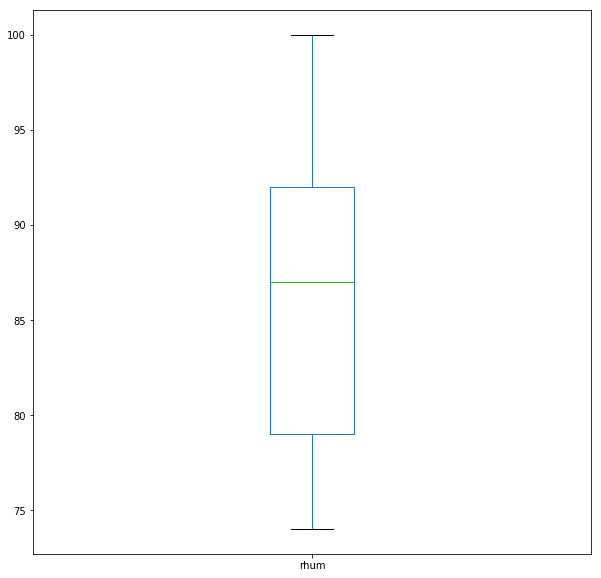

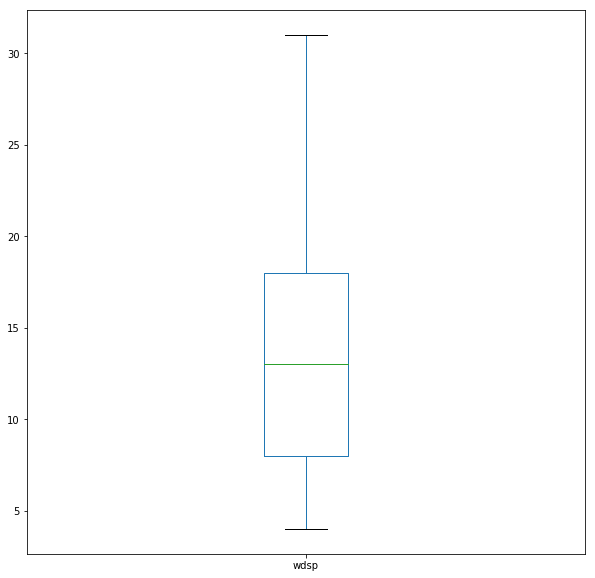

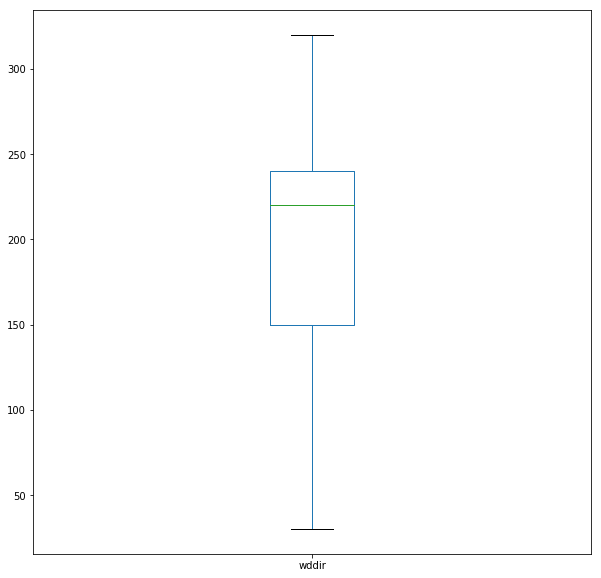

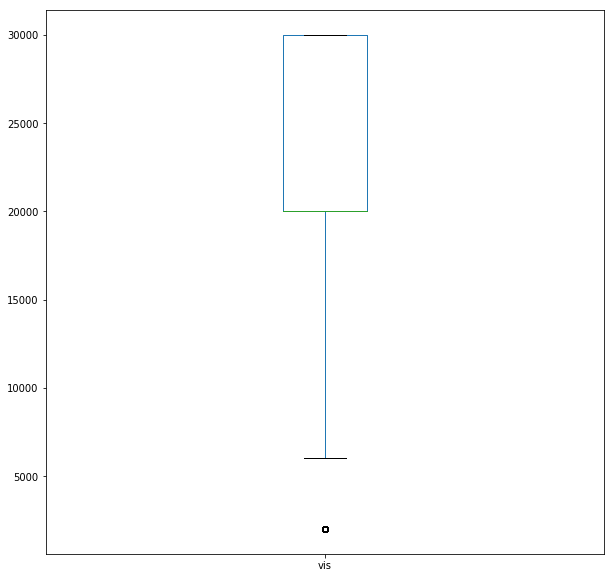

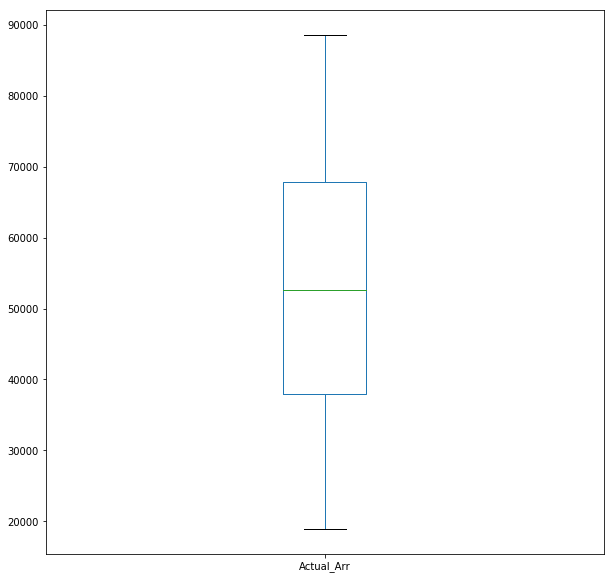

In [39]:
continuous = ['Planned_Arr','rhum','wdsp','wddir','vis']



for col in  continuous:
    f = route46A[col].plot(kind='box', figsize=(10,10))
    plt.show()

route46A['Actual_Arr'].plot(kind='box', figsize=(10,10))

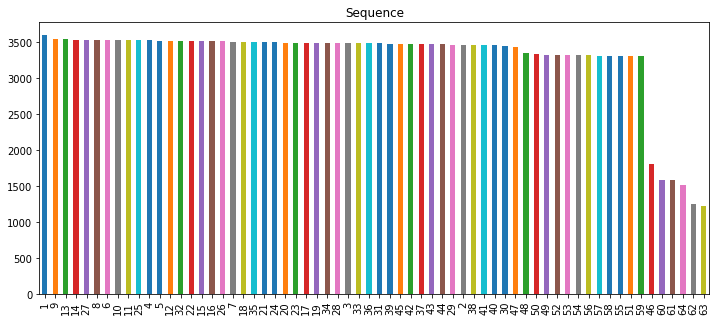

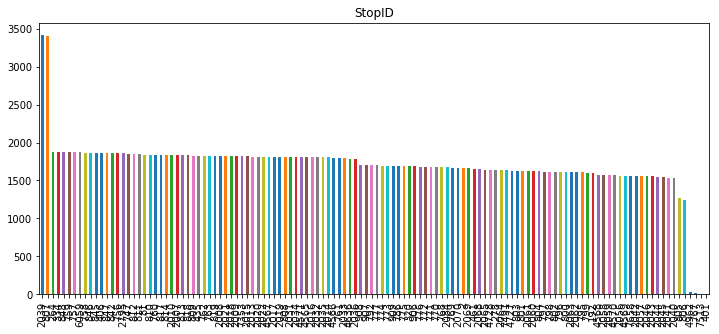

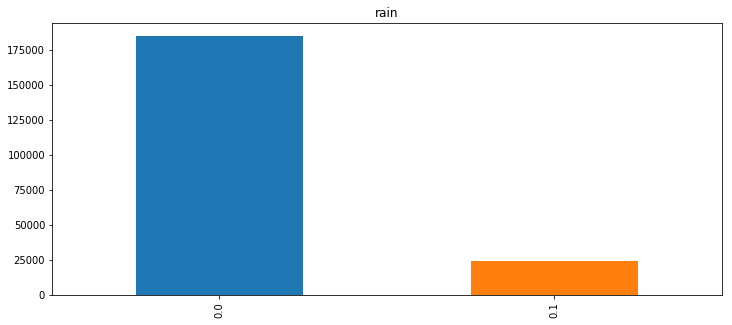

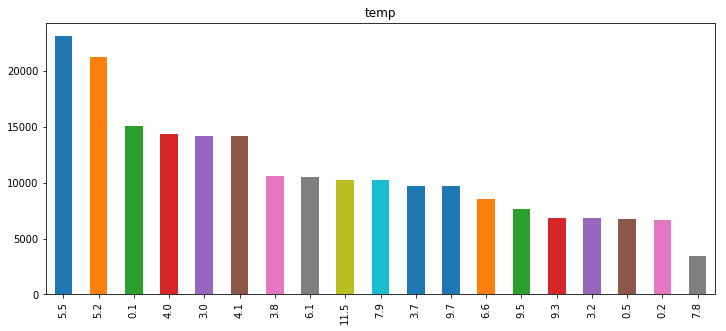

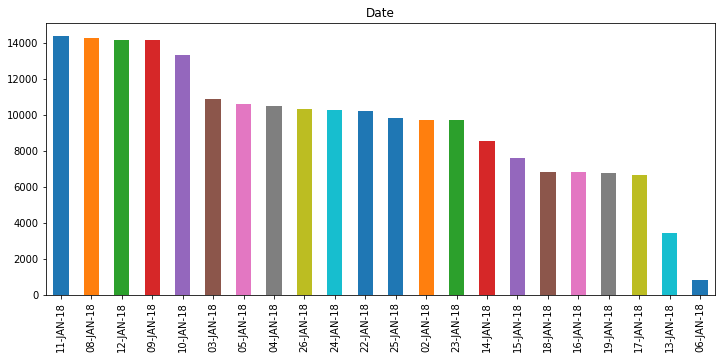

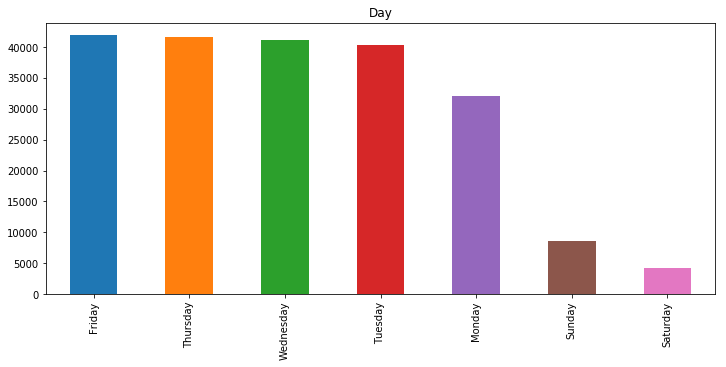

In [40]:
for column in categorical:
    f = route46A[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

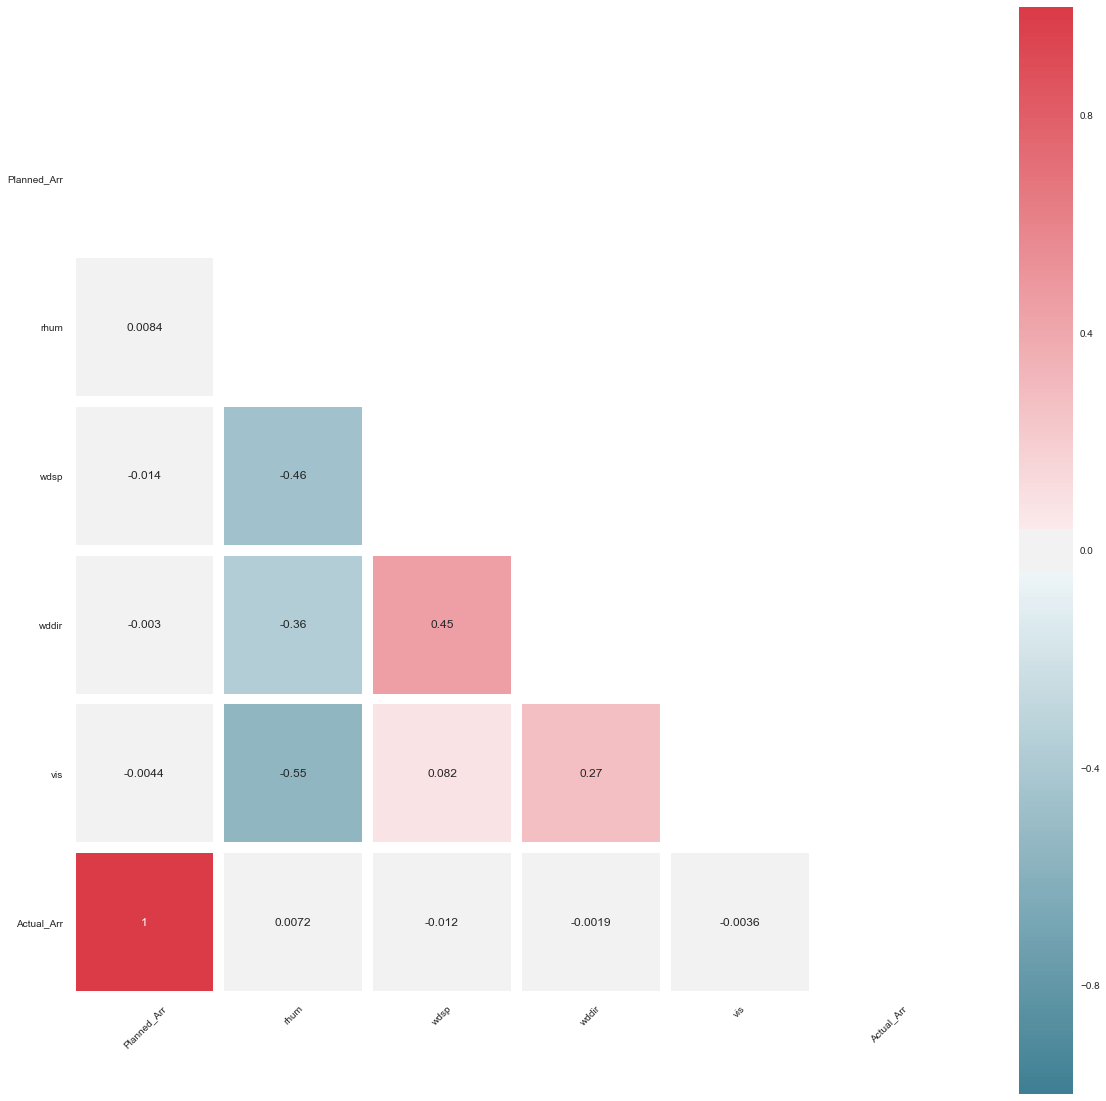

In [41]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html


sns.set(style='white')

# Calculate correlation of all pairs of continuous features
corr = route46A[continuous + ['Actual_Arr']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, square=True, xticklabels=True, yticklabels=True, linewidths=10, cbar_kws={"shrink":1}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

### 4) Outlier and BiCoding
In other edition

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
day_toDummy = pd.DataFrame(route46A['Day'])

In [44]:
dummy = pd.get_dummies(day_toDummy)

In [46]:
df_copy = pd.concat([route46A,dummy],axis=1)

In [47]:
route46A.head()

,Date_Time,Sequence,StopID,Planned_Arr,Actual_Arr,rain,temp,rhum,wdsp,wddir,vis,Date,Day
0,02-JAN-18 00:00:00,60,803,25434,25239,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
1,02-JAN-18 00:00:00,7,813,63698,63501,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
2,02-JAN-18 00:00:00,9,81,63878,63703,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
3,02-JAN-18 00:00:00,10,817,63977,63780,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday
4,02-JAN-18 00:00:00,11,818,64030,63792,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday


In [48]:
df_copy.head()

,Date_Time,Sequence,StopID,Planned_Arr,Actual_Arr,rain,temp,rhum,wdsp,wddir,vis,Date,Day,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,02-JAN-18 00:00:00,60,803,25434,25239,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday,0,0,0,0,0,1,0
1,02-JAN-18 00:00:00,7,813,63698,63501,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday,0,0,0,0,0,1,0
2,02-JAN-18 00:00:00,9,81,63878,63703,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday,0,0,0,0,0,1,0
3,02-JAN-18 00:00:00,10,817,63977,63780,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday,0,0,0,0,0,1,0
4,02-JAN-18 00:00:00,11,818,64030,63792,0.0,3.7,78,12,240,30000,02-JAN-18,Tuesday,0,0,0,0,0,1,0


#### 4.1) without weather

In [49]:
model_input = pd.DataFrame(df_copy[['Sequence','StopID','Planned_Arr','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']])

In [50]:
model_output = df_copy['Actual_Arr']

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(model_input,model_output,test_size=0.33,random_state=42)

In [52]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
prediction = rf.predict(X_test)
print(prediction)
print(Y_test)

[41176.728      80701.576      52099.66366667 ... 68191.2735
 48940.84797619 73893.4935    ]
100317    41408
169909    80601
203806    53321
44975     39842
142084    23893
78818     34014
92155     60701
154915    77151
19017     71598
119245    65478
109068    55023
121687    39246
122885    38400
41843     77094
92423     66466
68538     60967
48682     65672
139836    23906
178596    31659
52304     53065
115515    38276
79126     76652
55050     35874
93698     53434
126898    69199
14928     19078
1411      63600
88530     49476
51426     31120
81228     51723
          ...  
45846     39767
39363     29797
186520    49955
52771     55567
156428    38259
117892    48996
93461     55606
208692    83479
35669     53051
16434     44349
64956     61324
32165     32290
75521     81497
179899    34078
171690    28617
208854    31046
31414     67096
86289     58864
68955     46372
53306     80948
23469     23039
64891     28494
12942     68566
42477     33695
145407    18938
66348     3

In [54]:
import numpy as np

print(np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

351.13007052428975


In [67]:
rf.score(X_train,Y_train)

0.9998836745810739

In [56]:
rf.score(X_test,Y_test)

0.999591385797703

In [57]:
import pickle

pickle.dump(rf,open('prediction_for_46A_without_weather.pickle', 'wb'))

#### 4.2）with rain

In [58]:
model_input_1 = pd.DataFrame(df_copy[['rain','Sequence','StopID','Planned_Arr','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']])

In [61]:
model_output_1 = df_copy['Actual_Arr']

In [62]:
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(model_input,model_output,test_size=0.33,random_state=42)

In [63]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train_1,Y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
prediction_1 = rf.predict(X_test_1)
print(prediction_1)
print(Y_test_1)

[41189.39535714 80699.90833333 52167.405      ... 68237.09933333
 48911.45583333 73895.71233333]
100317    41408
169909    80601
203806    53321
44975     39842
142084    23893
78818     34014
92155     60701
154915    77151
19017     71598
119245    65478
109068    55023
121687    39246
122885    38400
41843     77094
92423     66466
68538     60967
48682     65672
139836    23906
178596    31659
52304     53065
115515    38276
79126     76652
55050     35874
93698     53434
126898    69199
14928     19078
1411      63600
88530     49476
51426     31120
81228     51723
          ...  
45846     39767
39363     29797
186520    49955
52771     55567
156428    38259
117892    48996
93461     55606
208692    83479
35669     53051
16434     44349
64956     61324
32165     32290
75521     81497
179899    34078
171690    28617
208854    31046
31414     67096
86289     58864
68955     46372
53306     80948
23469     23039
64891     28494
12942     68566
42477     33695
145407    18938
66348  

In [65]:
import numpy as np

print(np.sqrt(metrics.mean_squared_error(Y_test_1,prediction_1)))

351.2092907727785


In [68]:
rf.score(X_train_1,Y_train_1)

0.9998836745810739

In [66]:
rf.score(X_test_1,Y_test_1)

0.9995912013978295

In [ ]:
import pickle

pickle.dump(rf,open('prediction_for_46A_with_rain.pickle', 'wb'))